In [1]:
#Classes kNIFE b8
# rajor blade b7, B51
# b49 GUN
# b52 - 54, B50 shuriken

In [2]:
# Background
# 9-44 Has only guns, Put other stuff

In [3]:
import random
import os
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from PIL import Image,ImageDraw

import skimage.exposure

from utils import seperate_background,rotate_image,morpholize_image, get_bounding_box,rect,insert_image

In [4]:
#provide full path to whole baggage dataset
data_location = '/media/noobie/Data/MMD/MM811(AI)/Project/harmful_object_detection_in_baggage_xray/Baggages/Baggages'

Since the Images from 9-44 only have guns, we will add knife, rajor blade, and shuriken to them to increase robustness of the dataset

## Loading Background Images

In [5]:
background = range(44,44+1) # adding 1 to include 44 
background_paths = []
# now we will get path to all the images inside these folders
for folder_number in background:
    add_zero = '000' if len(str(folder_number))==1 else '00'
    folder_name = f'B{add_zero}{folder_number}'
    all_files = [ os.path.join(data_location,folder_name,img) for img in os.listdir(os.path.join(data_location,folder_name)) if '.png' in img]
    background_paths.extend(all_files)
    print(f'Scanning Folder : {folder_name} Found Images : {len(all_files)}')
print(f'Total Background Images: {len(background_paths)}')

Scanning Folder : B0044 Found Images : 178
Total Background Images: 178


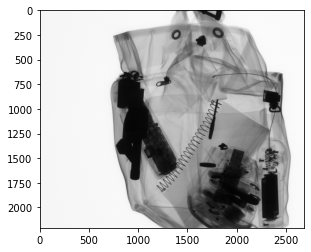

In [6]:
# Display random Background image
img = Image.open(random.choice(background_paths))
plt.imshow(img,cmap='gray')

## Loading the Foreground Images(Threats)


In [7]:
#Classes kNIFE b8
# rajor blade b7, B51
# b49 GUN
# b52 - 54, B50 shuriken
threat_map = {
    'knife':['B0008'],
    'rajor blade':['B0007','B0051'],
    'gun':['B0049'],
    'shuriken':['B0052','B0053','B0054','B0050'],
}
threat_paths = {
    'knife':[],
    'rajor blade':[],
    'gun':[],
    'shuriken':[],
}

In [8]:
# Load path to all threat images
# now we will get path to all the images inside these folders
for label,folders in threat_map.items():
    for folder_name in folders:
        
        all_files = [ os.path.join(data_location,folder_name,img) for img in os.listdir(os.path.join(data_location,folder_name)) if '.png' in img]
        threat_paths[label].extend(all_files)
        print(f'{label} : {folder_name} Found Images : {len(all_files)}')


knife : B0008 Found Images : 361
rajor blade : B0007 Found Images : 20
rajor blade : B0051 Found Images : 100
gun : B0049 Found Images : 200
shuriken : B0052 Found Images : 144
shuriken : B0053 Found Images : 144
shuriken : B0054 Found Images : 144
shuriken : B0050 Found Images : 100


Display Images sample

knife Images: 361
rajor blade Images: 120
gun Images: 200
shuriken Images: 532


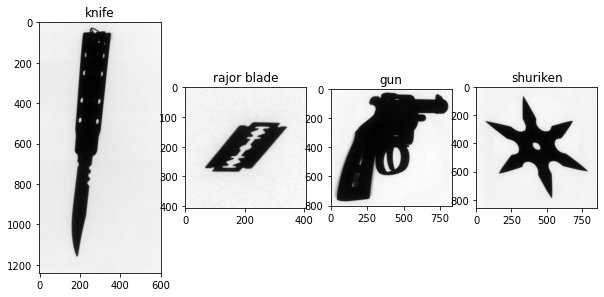

In [9]:
figure=plt.figure(figsize=(10,10))
count =1
for label, images in threat_paths.items():
    image = random.choice(images)
    img = Image.open(random.choice(images))
    plt.subplot(1,4,count)
    count+=1
    plt.title(label)
    plt.imshow(img,cmap='gray')
    print(f'{label} Images: {len(images)}')

## Creating Synthetic Images

In [10]:
# below the white region is the valid point for insertion
## testing background processing

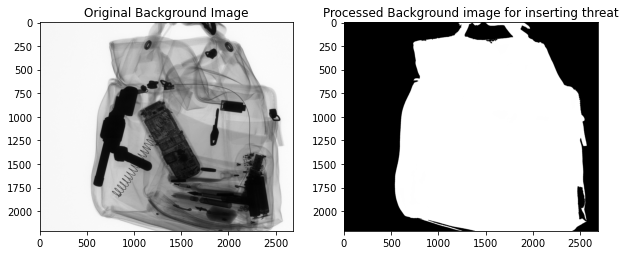

In [11]:
test_background = random.choice(background_paths)
img_morpholized = morpholize_image(test_background)

figure=plt.figure(figsize=(10,10))

plt.subplot(121)
img = Image.open(test_background)
plt.title('Original Background Image')
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.title('Processed Background image for inserting threat')
plt.imshow( img_morpholized,cmap='gray')
plt.show()

In [12]:
## testing image insertion

In [13]:
def generate_synthetic(number,threat_type,threat_paths,background_paths,synthetic_images_base):
    """
    Generate number  of synthetic images
    """
    image_meta_data = []
    threshold=100
    if threat_type=='rajor blade':
        threshold = threshold*2
    threats = threat_paths[threat_type]
    while number!=0:
        try:
            print(f'{threat_type}  {number} ')
            threat = random.choice(threats)
            background = random.choice(background_paths)
            tipped_image_no_bbox, tipped_image ,bbox = insert_image(threat_path=threat, background_path=background,threshold=threshold)
            image_name = f'{threat_type}_{number}.jpg'
            image_name_box = f'{threat_type}_{number}_box.jpg'
            image_meta_data.append(
                {

                    'path':image_name,
                    'label':threat_type,
                    'xmin':bbox[0][0],
                    'ymin':bbox[0][1],
                    'xmax':bbox[-1][0],
                    'ymax':bbox[-1][1],
                }
            )
    #         breakpoint()
    #         print(threat)
            tipped_image_no_bbox.save(os.path.join(synthetic_images_base,image_name))
    #         tipped_image.save(os.path.join(synthetic_images_base,image_name_box))
            number = number-1
    #         plt.imshow(tipped_image)
    #         plt.title('Results')
    #         plt.show()
    #         break
        except Exception as e:
            print(e)
    return image_meta_data

In [14]:
synthetic_images_base = '/media/noobie/Data/MMD/MM811(AI)/Project/Harmful_Objects_X-Ray_Baggage/TIP/Synthetic_images1'

In [15]:
meta_data = []


In [16]:

meta_data_mini = generate_synthetic(number=500,threat_type='knife',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
meta_data.extend(meta_data_mini)

meta_data_mini = generate_synthetic(number=500,threat_type='rajor blade',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
meta_data.extend(meta_data_mini)


meta_data_mini = generate_synthetic(number=500,threat_type='shuriken',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
meta_data.extend(meta_data_mini)


knife  500 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
knife  499 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
knife  498 
999
998
997
996
995
994
993
992
knife  497 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
knife  496 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
knife  495 
999
998
997
996
995
994
993
knife  494 
999
998
997
996
995
994
993
992
991
990
knife  493 
999
998
997
996
995
994
993
992
knife  492 
999
998
997
996
995
994
knife  491 
999
998
997
996
995
knife  490 
999
knife  489 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966


999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
knife  354 
999
998
knife  353 
999
998
997
996
995
994
993
knife  352 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
knife  351 
999
knife  350 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
knife  349 
999
998
997
996
995
994
993
992
knife  348 
999
knife  347 
999
998
997
knife  346 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
knife  345 
999
998
997
996
knife  344 
999
998
997
996
995
994
993
992
knife  343 
999
998
997
knife  342 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
knife  341 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
knife  340 
999
998
997
knife  339 
999
998
997
knife  338 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
knife  337 


knife  200 
999
knife  199 
999
998
997
996
995
994
993
992
991
990
989
988
knife  198 
999
998
997
996
995
994
993
992
991
990
knife  197 
999
998
997
996
995
994
993
992
knife  196 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
knife  195 
999
998
997
knife  194 
999
998
knife  193 
999
998
997
996
995
994
knife  192 
999
998
997
996
995
994
993
992
991
knife  191 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
knife  190 
999
knife  189 
999
knife  188 
999
998
997
996
knife  187 
999
998
knife  186 
999
998
997
996
995
994
993
992
991
knife  185 
999
998
997
996
995
994
993
knife  184 
999
998
997
996
995
994
993
knife  183 
999
998
997
996
995
994
993
992
knife  182 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
knife  181 
999
998
997
996
995
994
knife  180 
999


999
998
knife  36 
999
998
997
knife  35 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
knife  34 
999
knife  33 
999
knife  32 
999
998
997
996
995
994
993
992
knife  31 
999
998
knife  30 
999
998
997
996
995
994
993
992
991
knife  29 
999
998
997
996
995
994
993
992
991
990
989
knife  28 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
knife  27 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
knife  26 
999
998
997
996
995
994
993
992
991
990
989
988
987
knife  25 
999
998
997
knife  24 
999
998
997
996
995
994
993
992
knife  23 
999
998
997
knife  22 
999
998
997
knife  21 
999
998
knife  20 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
knife  19 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
knife  18 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962

rajor blade  259 
999
998
rajor blade  258 
999
rajor blade  257 
999
rajor blade  256 
999
rajor blade  255 
999
rajor blade  254 
999
rajor blade  253 
999
998
rajor blade  252 
999
rajor blade  251 
999
998
997
rajor blade  250 
999
rajor blade  249 
999
998
rajor blade  248 
999
rajor blade  247 
999
rajor blade  246 
999
rajor blade  245 
999
rajor blade  244 
999
rajor blade  243 
999
998
997
996
995
rajor blade  242 
999
rajor blade  241 
999
rajor blade  240 
999
rajor blade  239 
999
rajor blade  238 
999
rajor blade  237 
999
rajor blade  236 
999
rajor blade  235 
999
998
997
rajor blade  234 
999
rajor blade  233 
999
rajor blade  232 
999
998
997
rajor blade  231 
999
998
rajor blade  230 
999
rajor blade  229 
999
998
rajor blade  228 
999
998
rajor blade  227 
999
rajor blade  226 
999
998
997
rajor blade  225 
999
998
rajor blade  224 
999
rajor blade  223 
999
rajor blade  222 
999
998
rajor blade  221 
999
rajor blade  220 
999
998
997
rajor blade  219 
999
rajor blad

shuriken  461 
999
998
997
shuriken  460 
999
998
997
996
995
994
993
992
991
990
shuriken  459 
999
998
997
996
shuriken  458 
999
998
997
996
995
994
993
992
991
990
989
988
shuriken  457 
999
998
997
996
995
994
993
992
991
990
989
shuriken  456 
999
998
997
996
995
994
993
shuriken  455 
999
998
997
996
995
994
993
992
shuriken  454 
999
shuriken  453 
999
998
997
996
995
shuriken  452 
999
998
shuriken  451 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
shuriken  450 
999
shuriken  449 
999
998
997
shuriken  448 
999
998
997
996
995
994
993
992
991
990
shuriken  447 
999
998
997
996
995
994
993
992
991
990
989
988
987
shuriken  446 
999
998
shuriken  445 
999
998
997
996
995
994
shuriken  444 
999
shuriken  443 
999
998
997
996
995
994
993
992
991
990
shuriken  442 
999
998
997
shuriken  441 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
shuriken  440 
999
shuriken  439 
999
998
997
996
995
994
993
992
991
990
shuriken  438 
999
998
997
shur

999
shuriken  265 
999
998
shuriken  264 
999
shuriken  263 
999
998
997
996
995
shuriken  262 
999
998
997
shuriken  261 
999
998
997
996
995
994
993
992
991
990
989
988
987
shuriken  260 
999
shuriken  259 
999
998
shuriken  258 
999
shuriken  257 
999
998
shuriken  256 
999
998
997
996
shuriken  255 
999
998
997
996
995
shuriken  254 
999
998
997
shuriken  253 
999
998
shuriken  252 
999
shuriken  251 
999
shuriken  250 
999
998
997
996
995
994
shuriken  249 
999
shuriken  248 
999
998
997
shuriken  247 
999
998
997
996
995
994
shuriken  246 
999
998
997
996
995
994
shuriken  245 
999
998
shuriken  244 
999
998
997
996
995
994
shuriken  243 
999
998
997
996
995
994
shuriken  242 
999
998
997
996
995
994
993
992
shuriken  241 
999
998
997
996
995
shuriken  240 
999
998
997
996
995
994
993
992
shuriken  239 
999
shuriken  238 
999
998
shuriken  237 
999
shuriken  236 
999
shuriken  235 
999
998
shuriken  234 
999
998
997
996
995
shuriken  233 
999
998
997
996
shuriken  232 
999
998
99

999
998
997
996
995
994
993
992
991
shuriken  66 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
shuriken  65 
999
998
997
996
995
994
shuriken  64 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
shuriken  63 
999
998
997
996
995
994
993
shuriken  62 
999
998
997
996
shuriken  61 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
shuriken  60 
999
998
997
shuriken  59 
999
998
997
shuriken  58 
999
998
shuriken  57 
999
shuriken  56 
999
998
shuriken  55 
999
998
997
996
995
shuriken  54 
999
shuriken  53 
999
shuriken  52 
999
998
997
shuriken  51 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
shuriken  50 
999
998
997
996
995
994
993
shuriken  49 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
shuriken  48 
999
998
shuriken  47 
999
shuriken  46 
999
998
997
996
995
994
993
shuriken  45 
999
shuriken  44 
999
998
997
996
995
shuriken  43 
999
998
997
996
995
994
shuriken  42 
999
998
99

In [17]:
def seperate_background(img_name):
    # https://stackoverflow.com/questions/5365589/white-background-to-transparent-background-using-pil-python
    threshold=200
    dist=5
    # print(img_name)
    img=Image.open(img_name).convert('RGBA')
    # img = img.rotate(100)
    # np.asarray(img) is read only. Wrap it in np.array to make it modifiable.
    arr=np.array(np.asarray(img))
    r,g,b,a=np.rollaxis(arr,axis=-1)    
    mask=((r>threshold)
        & (g>threshold)
        & (b>threshold)
        & (np.abs(r-g)<dist)
        & (np.abs(r-b)<dist)
        & (np.abs(g-b)<dist)
        )
    arr[mask,3]=0
    img=Image.fromarray(arr,mode='RGBA')
    img.rotate(90)
    img.save('tmpc.png')
    return 'tmpc.png'


In [18]:
seperate_background('/media/noobie/Data/MMD/MM811(AI)/Project/harmful_object_detection_in_baggage_xray/Baggages/Baggages/B0007/B0007_0005.png')

'tmpc.png'

In [19]:
import pandas as pd

In [20]:
df =pd.DataFrame(meta_data)
df.to_csv('labels.csv')

In [21]:
test_background = random.choice(background_paths)
test_threat = random.choice(threat_paths['knife'])
tipped_image_no_bbox, tipped_image ,bbox = insert_image(threat_path=test_threat, background_path=test_background)

999
998
997


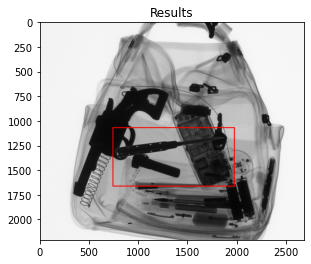

In [22]:

# figure=plt.figure(figsize=(20,20))

plt.imshow(tipped_image)
plt.title('Results')
    
plt.show()

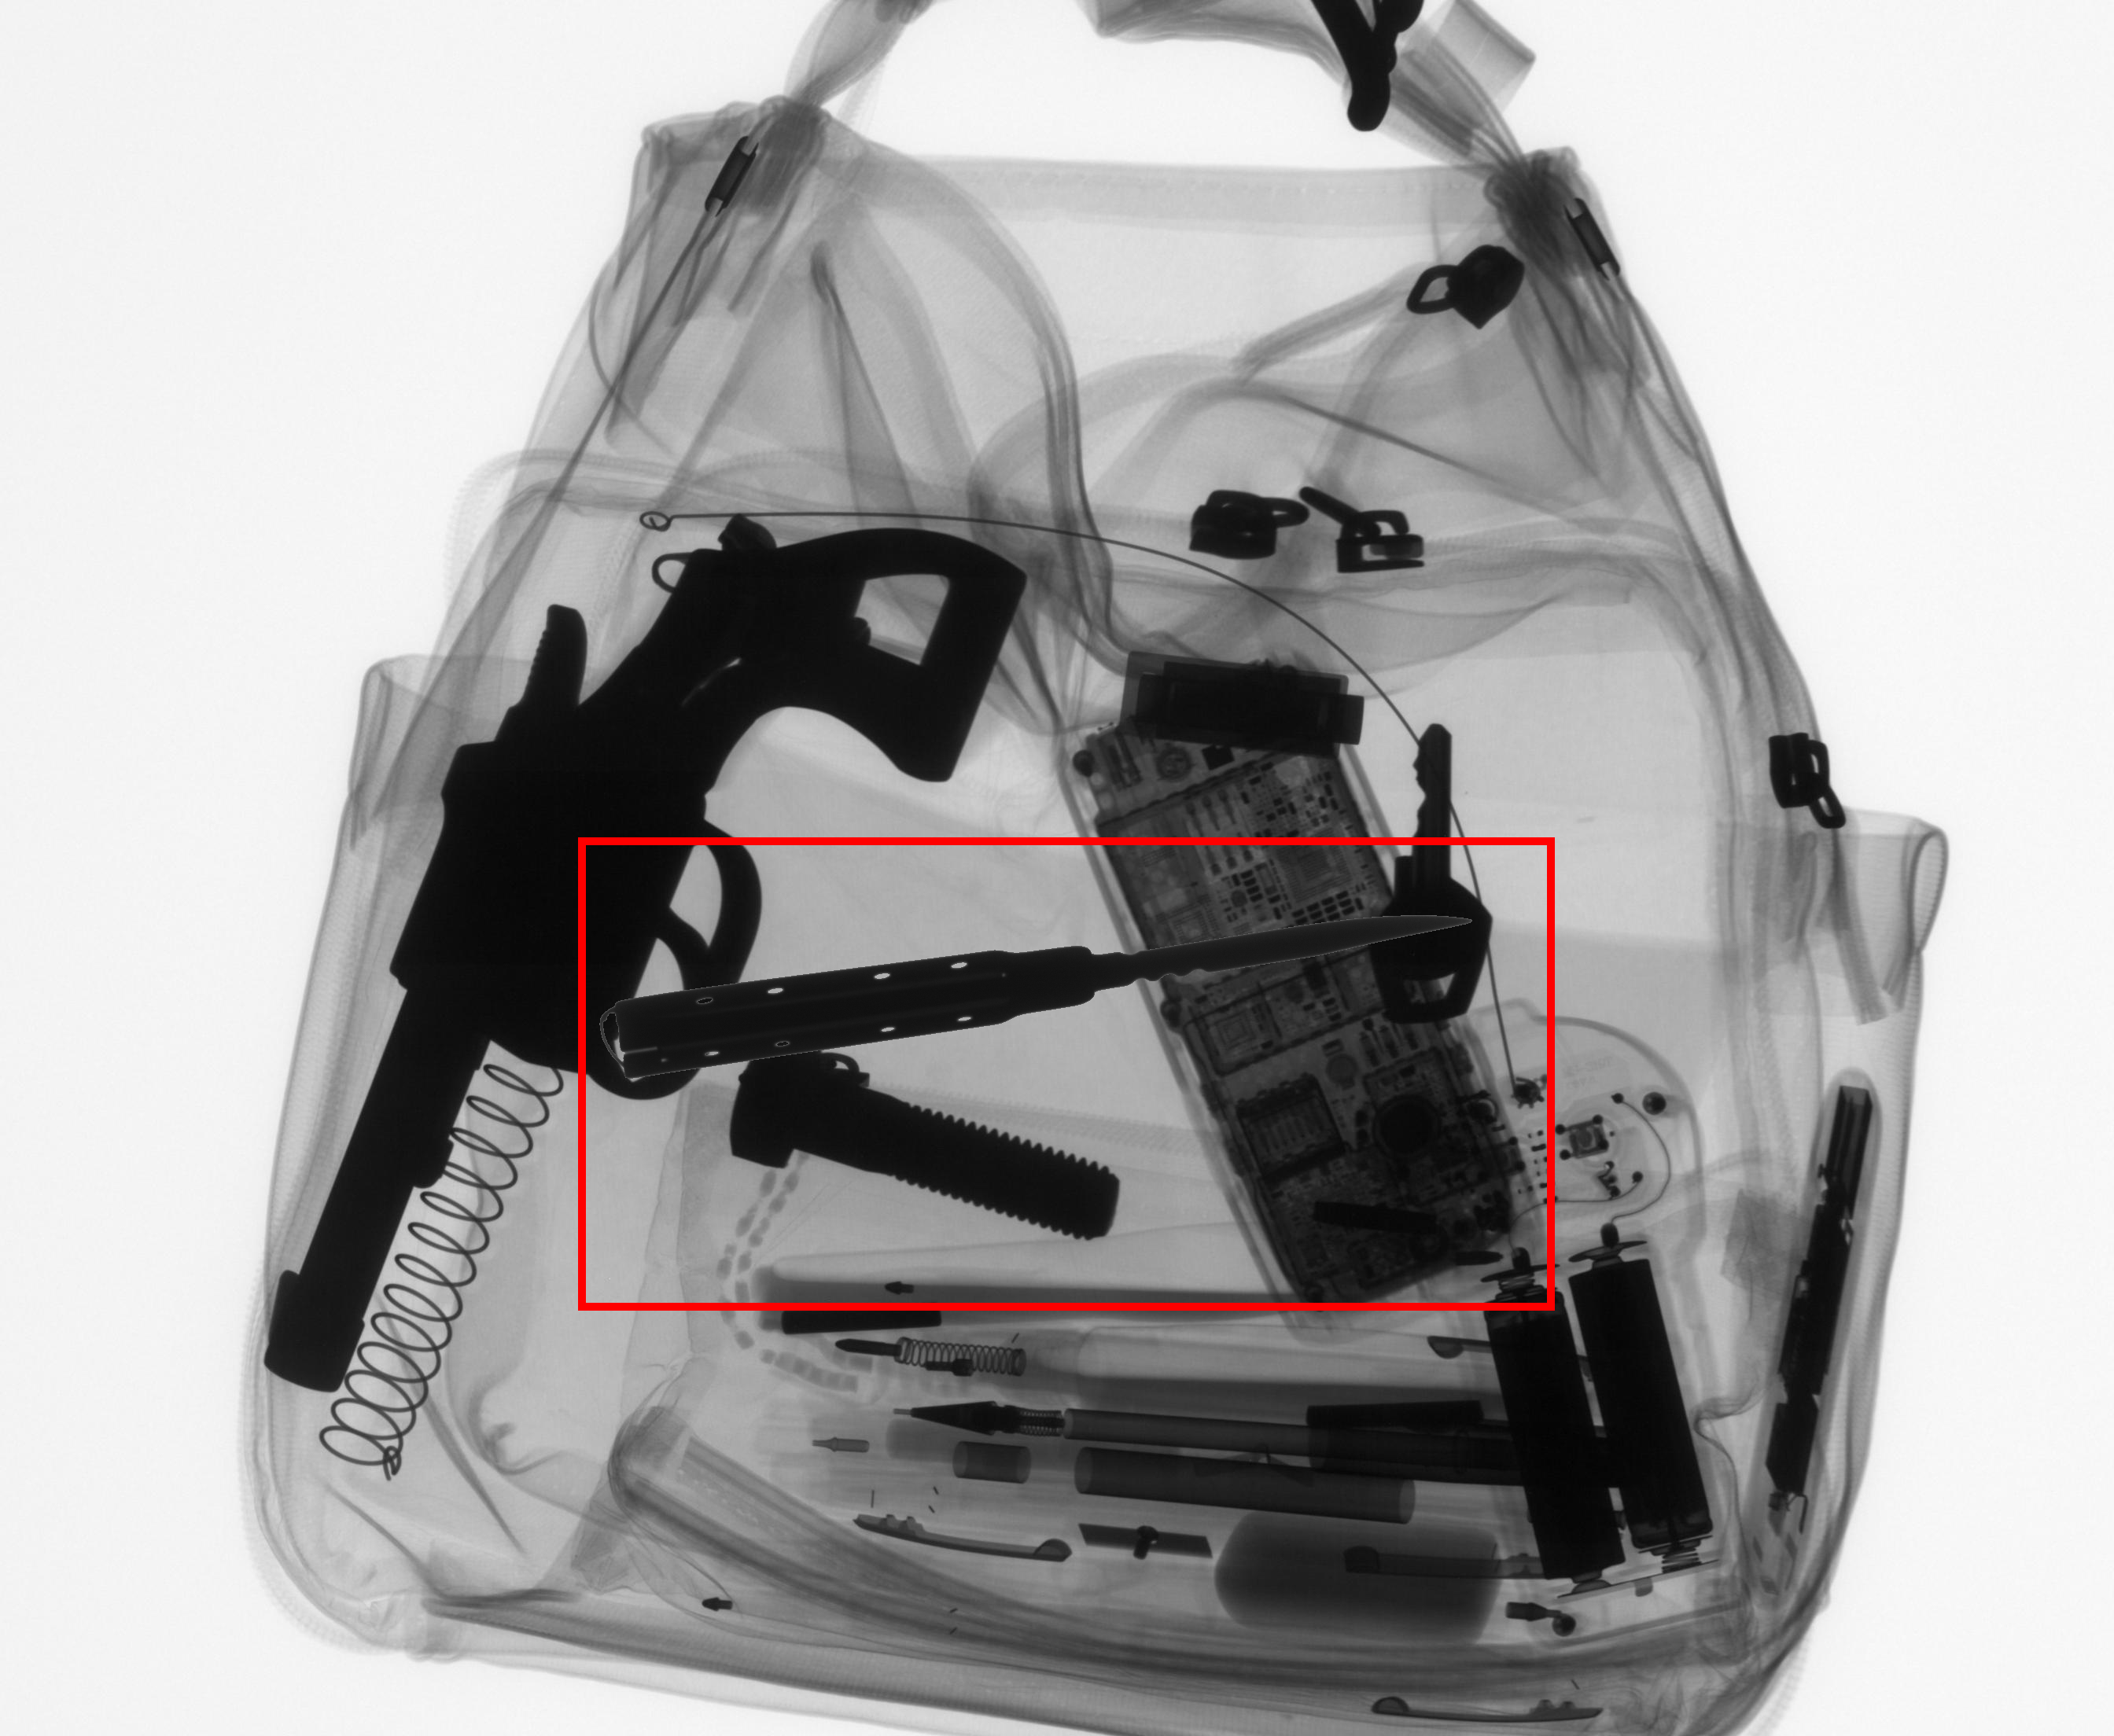

In [23]:
tipped_image.copy()

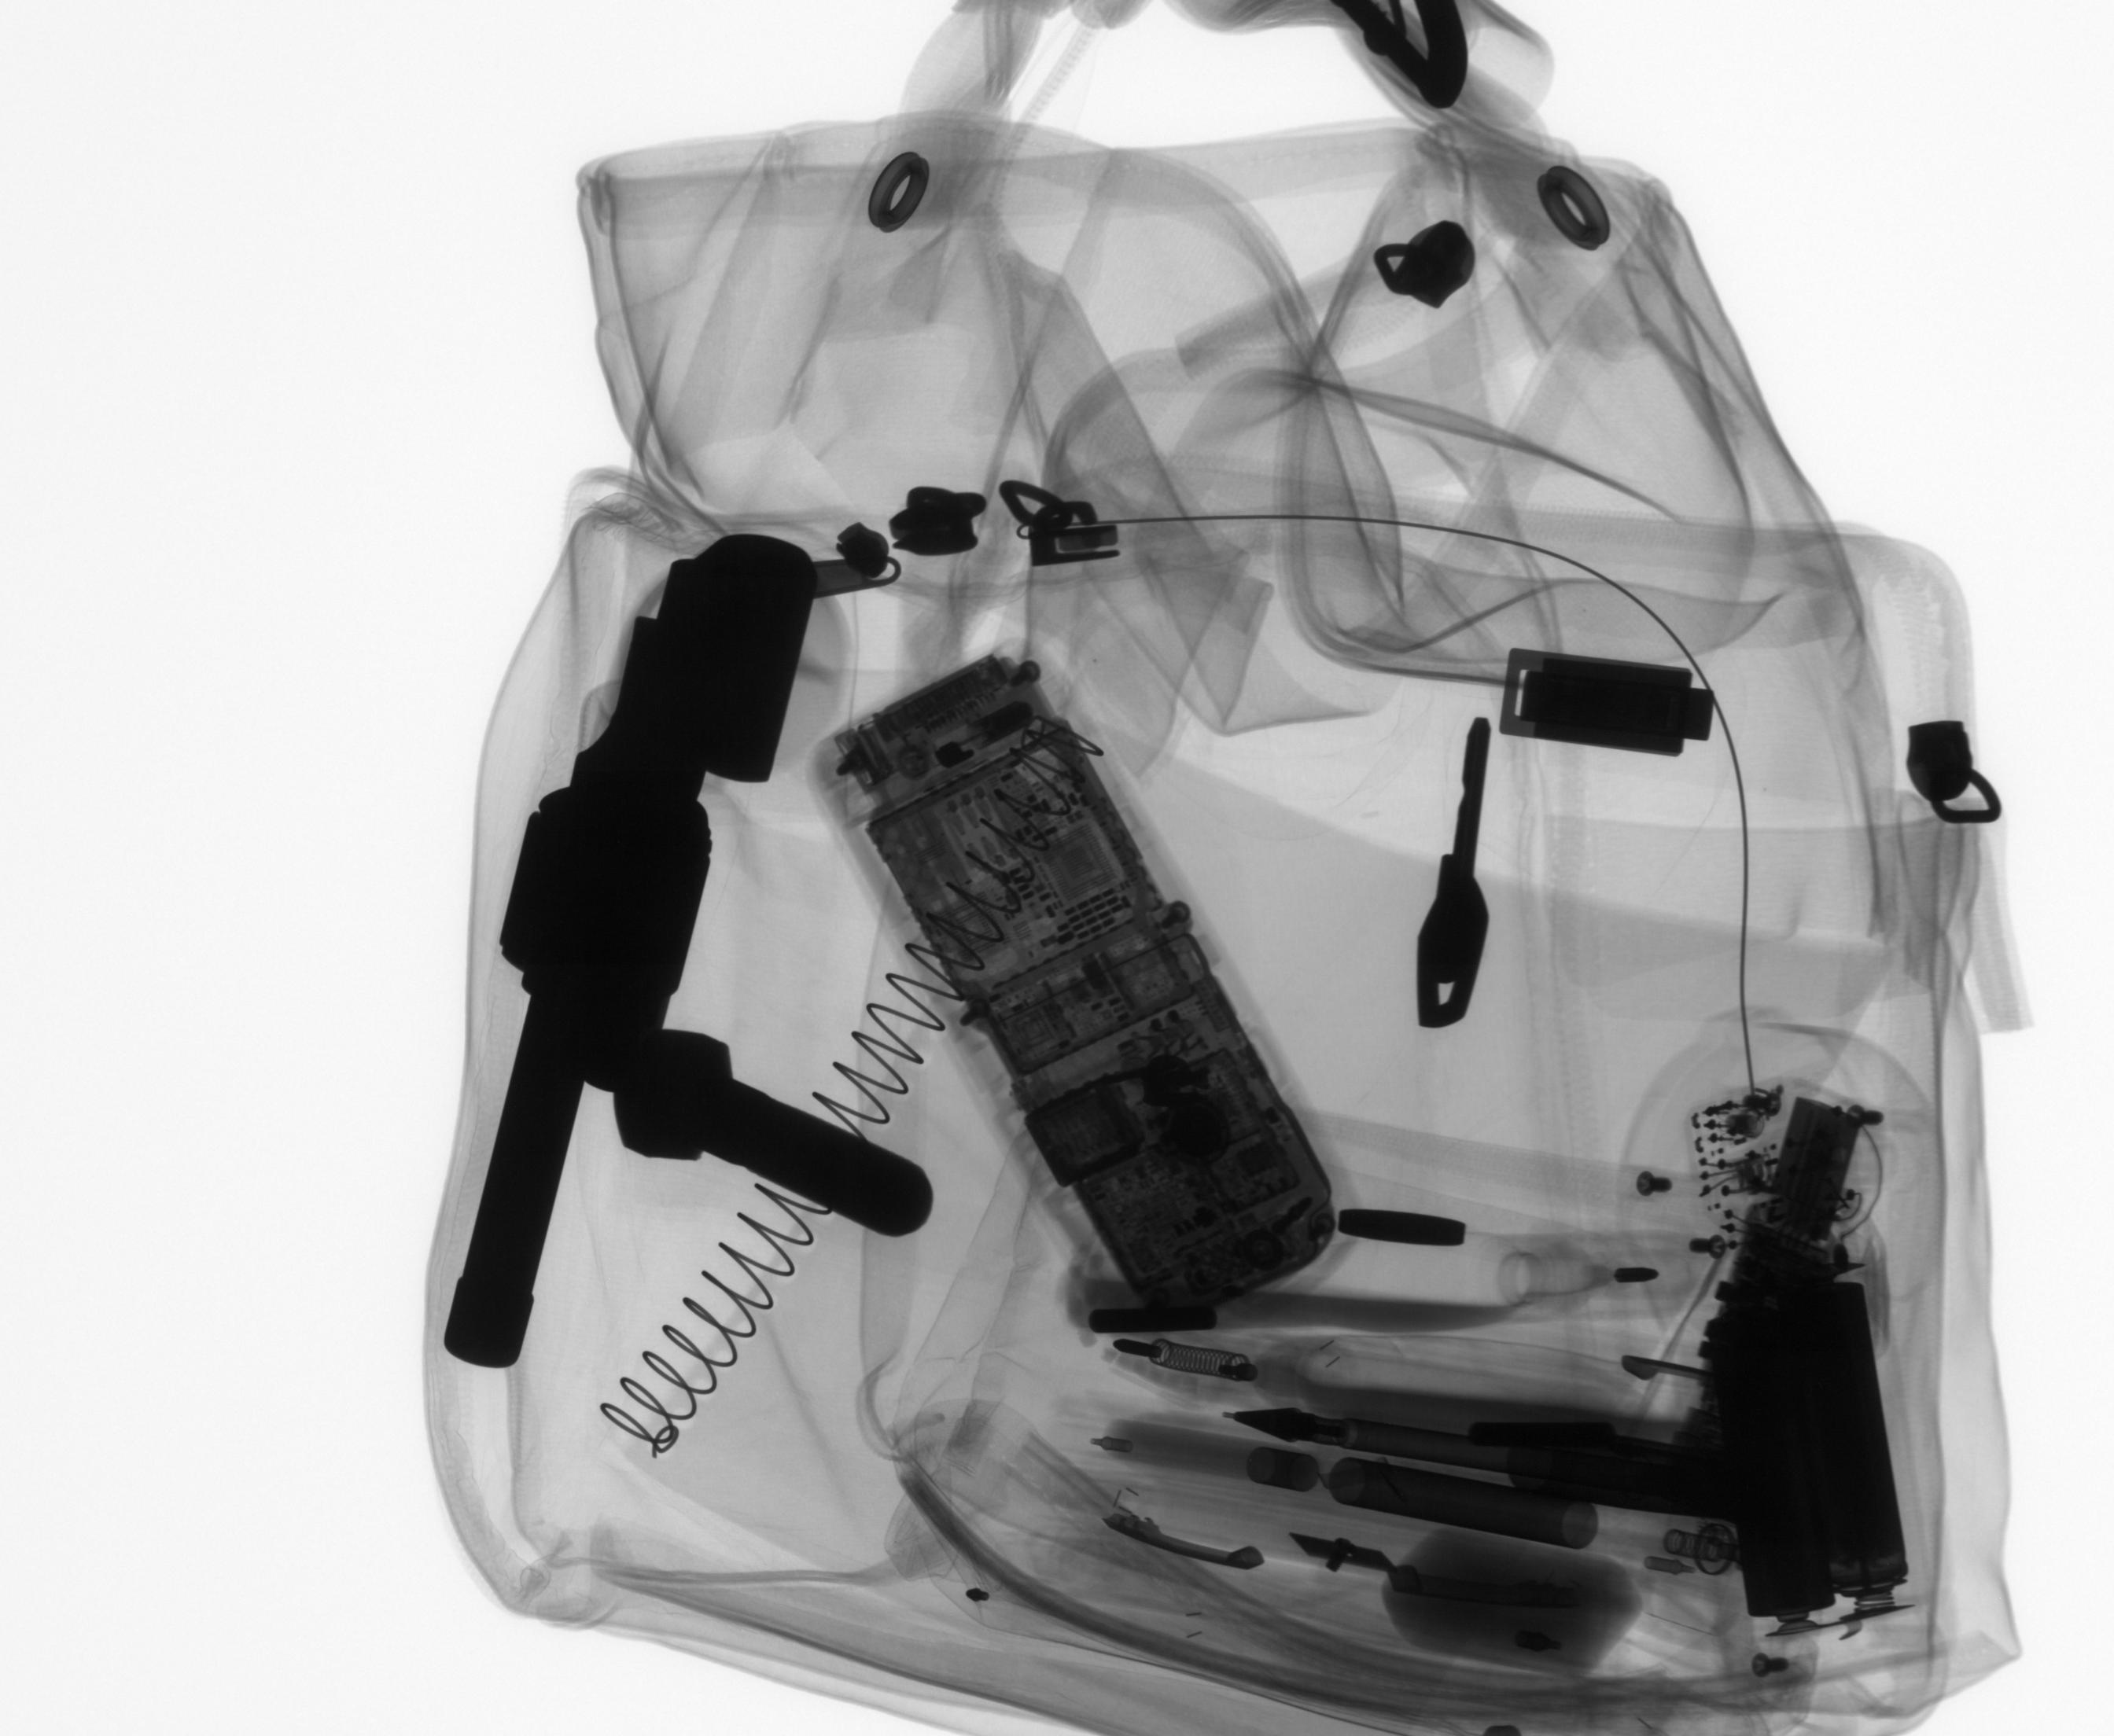

In [24]:
img

In [25]:
len(meta_data)

1500